    Ben Christensen
    Math 321
    11/9/17

Access and plot data using SQL

In [1]:
import sqlite3 as sql
import csv
from matplotlib import pyplot as plt

In [2]:
path = "/Users/benchristensen/Desktop/ACME Python Labs/Volume2-Student-Materials/SQL1/"
#row = tuple (one observation)
#column = attribute or feature (data value)
#schema = collection of attributes
#Data names: NULL, INTEGER, REAL, TEXT
# Problems 1, 2, and 4
def student_db(db_file=path+"students.db", student_info=path+"student_info.csv",
                                      student_grades=path+"student_grades.csv"):
    """Connect to the database db_file (or create it if it doesn’t exist).
    Drop the tables MajorInfo, CourseInfo, StudentInfo, and StudentGrades from
    the database (if they exist). Recreate the following (empty) tables in the
    database with the specified columns.

        - MajorInfo: MajorID (integers) and MajorName (strings).
        - CourseInfo: CourseID (integers) and CourseName (strings).
        - StudentInfo: StudentID (integers), StudentName (strings), and
            MajorID (integers).
        - StudentGrades: StudentID (integers), CourseID (integers), and
            Grade (strings).

    Next, populate the new tables with the following data and the data in
    the specified 'student_info' 'student_grades' files.

                MajorInfo                         CourseInfo
            MajorID | MajorName               CourseID | CourseName
            -------------------               ---------------------
                1   | Math                        1    | Calculus
                2   | Science                     2    | English
                3   | Writing                     3    | Pottery
                4   | Art                         4    | History

    Finally, in the StudentInfo table, replace values of −1 in the MajorID
    column with NULL values.

    Parameters:
        db_file (str): The name of the database file.
        student_info (str): The name of a csv file containing data for the
            StudentInfo table.
        student_grades (str): The name of a csv file containing data for the
            StudentGrades table.
    """
    try:
        with sql.connect(db_file) as conn:
            cur = conn.cursor()
            cur.execute("DROP TABLE IF EXISTS MajorInfo;")
            cur.execute("DROP TABLE IF EXISTS CourseInfo;")
            cur.execute("DROP TABLE IF EXISTS StudentInfo;")
            cur.execute("DROP TABLE IF EXISTS StudentGrades;")
            cur.execute("CREATE TABLE MajorInfo (MajorID INTEGER, MajorName TEXT);")
            cur.execute("CREATE TABLE CourseInfo (CourseID INTEGER, CourseName TEXT);")
            cur.execute("CREATE TABLE StudentInfo (StudentID INTEGER, StudentName TEXT, MajorID INTEGER);")
            cur.execute("CREATE TABLE StudentGrades (StudentID INTEGER, CourseID INTEGER, Grade TEXT);")
    finally:
        conn.close()

    with open(path+"student_info.csv", 'r') as infile:
        student_info = list(csv.reader(infile))
    with open(path+"student_grades.csv", 'r') as infile:
        student_grades = list(csv.reader(infile))
    for student in student_info:
        student[0], student[-1] = int(student[0]), int(student[-1])
    for grade in student_grades:
        grade[0], grade[1] = int(grade[0]), int(grade[1])
    try:
        with sql.connect(db_file) as conn:
            cur = conn.cursor()
            cur.executemany("INSERT INTO StudentInfo Values(?,?,?);", student_info)
            cur.executemany("INSERT INTO StudentGrades Values(?,?,?);", student_grades)
            cur.execute("INSERT INTO MajorInfo Values(1, 'Math');")
            cur.execute("INSERT INTO MajorInfo Values(2, 'Science');")
            cur.execute("INSERT INTO MajorInfo Values(3, 'Writing');")
            cur.execute("INSERT INTO MajorInfo Values(4, 'Art');")
            cur.execute("INSERT INTO CourseInfo Values(1, 'Calculus');")
            cur.execute("INSERT INTO CourseInfo Values(2, 'English');")
            cur.execute("INSERT INTO CourseInfo Values(3, 'Pottery');")
            cur.execute("INSERT INTO CourseInfo Values(4, 'History');")
            #problem 4
            cur.execute("UPDATE StudentInfo SET MajorID=NULL WHERE MajorID==-1;")

    finally:
        conn.close()








# Problems 3 and 4
def earthquakes_db(db_file=path+"earthquakes.db", data_file=path+"us_earthquakes.csv"):
    """Connect to the database db_file (or create it if it doesn’t exist).
    Drop the USEarthquakes table if it already exists, then create a new
    USEarthquakes table with schema
    (Year, Month, Day, Hour, Minute, Second, Latitude, Longitude, Magnitude).
    Populate the table with the data from 'data_file'.

    For the Minute, Hour, Second, and Day columns in the USEarthquakes table,
    change all zero values to NULL. These are values where the data originally
    was not provided.

    Parameters:
        db_file (str): The name of the database file.
        data_file (str): The name of a csv file containing data for the
            USEarthquakes table.
    """
    with open(path+"us_earthquakes.csv", 'r') as infile:
        earthquakes = list(csv.reader(infile))

    for earthquake in earthquakes:
        for i in range(len(earthquake)):
            if i < 6:
                earthquake[i] = int(earthquake[i])
            else:
                earthquake[i] = float(earthquake[i])

    try:
        with sql.connect(db_file) as conn:
            cur = conn.cursor()
            cur.execute("DROP TABLE IF EXISTS USEarthquakes;")
            cur.execute("CREATE TABLE USEarthquakes (Year INTEGER, "
                        "Month INTEGER, Day INTEGER, Hour INTEGER, "
                        "Minute INTEGER, Second INTEGER, Latitude REAL, "
                        "Longitude REAL, Magnitude REAL);")
            cur.executemany("INSERT INTO USEarthquakes "
                            "Values(?,?,?,?,?,?,?,?,?);", earthquakes)
            #problem 4
            cur.execute("DELETE FROM USEarthquakes WHERE Magnitude==0;")
            cur.execute("UPDATE USEarthquakes SET Day = NULL WHERE Day==0;")
            cur.execute("UPDATE USEarthquakes SET Hour = NULL WHERE Hour==0;")
            cur.execute("UPDATE USEarthquakes SET Minute = NULL WHERE Minute==0;")
            cur.execute("UPDATE USEarthquakes SET Second = NULL WHERE Second==0;")
    finally:
        conn.close()



# Problem 5
def prob5(db_file=path+"students.db"):
    """Query the database for all tuples of the form (StudentName, CourseName)
    where that student has an 'A' or 'A+'' grade in that course. Return the
    list of tuples.

    Parameters:
        db_file (str): the name of the database to connect to.

    Returns:
        (list): the complete result set for the query.
    """
    try:
        with sql.connect(db_file) as conn:
            cur = conn.cursor()
            cur.execute("SELECT SI.StudentName, CI.CourseName "
                        "FROM StudentInfo AS SI, CourseInfo AS CI, "
                        "StudentGrades AS SG "
                        "WHERE SI.StudentID == SG.StudentID AND (SG.Grade == 'A' OR SG.Grade == 'A+') AND CI.CourseID == SG.CourseID;")
            query = cur.fetchall()

    finally:
        conn.close()

    return query


# Problem 6
def prob6(db_file=path+"earthquakes.db"):
    """Create a single figure with two subplots: a histogram of the magnitudes
    of the earthquakes from 1800-1900, and a histogram of the magnitudes of the
    earthquakes from 1900-2000. Also calculate and return the average magnitude
    of all of the earthquakes in the database.

    Parameters:
        db_file (str): the name of the database to connect to.

    Returns:
        (float): The average magnitude of all earthquakes in the database.
    """

    try:
        with sql.connect(db_file) as conn:
            cur = conn.cursor()
            cur.execute("SELECT Magnitude FROM USEarthquakes "
                        "WHERE Year >= 1800 AND Year < 1900;")
            nineteenth = [t[0] for t in cur.fetchall()]
            cur.execute("SELECT Magnitude FROM USEarthquakes "
                        "WHERE Year >= 1900 AND Year < 2000;")
            twentieth = [t[0] for t in cur.fetchall()]
            cur.execute("SELECT Magnitude FROM USEarthquakes")
            magnitudes = [t[0] for t in cur.fetchall()]
            average = sum(magnitudes) / len(magnitudes)
    finally:
        conn.close()

    plt.subplot(121)
    plt.hist(nineteenth)
    plt.title("1800's")
    plt.ylim(0, 900)

    plt.subplot(122)
    plt.hist(twentieth)
    plt.title("1900's")
    plt.ylim(0, 900)

    plt.show()
    return average


In [3]:
student_db()
with sql.connect(path+"students.db") as conn:
    cur = conn.cursor()
    for row in cur.execute("SELECT * FROM StudentInfo;"):
        print(row)

earthquakes_db()
with sql.connect(path+"earthquakes.db") as conn:
    cur = conn.cursor()
    for row in cur.execute("SELECT * FROM USEarthquakes;"):
        #print(row)
        pass


earthquakes_db()
with sql.connect(path+"earthquakes.db") as conn:
    cur = conn.cursor()
    cur.execute("SELECT Magnitude FROM USEarthquakes;")
    magnitudes = cur.fetchall()
    #print(magnitudes)

(401767594, 'Michelle Fernandez', 1)
(678665086, 'Gilbert Chapman', None)
(553725811, 'Roberta Cook', 2)
(886308195, 'Rene Cross', 3)
(103066521, 'Cameron Kim', 4)
(821568627, 'Mercedes Hall', None)
(206208438, 'Kristopher Tran', 2)
(341324754, 'Cassandra Holland', 1)
(262019426, 'Alfonso Phelps', None)
(622665098, 'Sammy Burke', 2)


In [4]:
prob5()

[('Gilbert Chapman', 'History'),
 ('Gilbert Chapman', 'Pottery'),
 ('Rene Cross', 'Calculus'),
 ('Mercedes Hall', 'English'),
 ('Kristopher Tran', 'English'),
 ('Cameron Kim', 'History'),
 ('Sammy Burke', 'Calculus')]

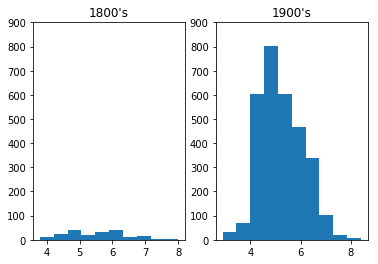

5.24777123633309

In [5]:
prob6()